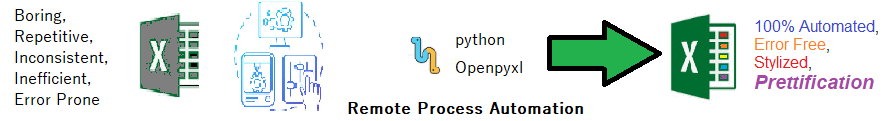

# Remote Process Automation Excel
##### Created Joe Eberle - 11/23/2022

In [1]:
import glob 
import rpa_excel as re

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution 

In [2]:
# Install any libraries you dont already have installed 
import configparser   
from datetime import date, datetime

# establish the configuration settings parser
config = configparser.ConfigParser()  
cfg = config.read('config.ini')   

# Establish some parameters 
solution_name = 'remote_process_automation_excel'

## Optional Step 0 - Intitiate the Logger

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

In [7]:
import yfinance as yf
import pandas as pd

In [10]:
sp500 = yf.Ticker("^GSPC")   # get the stock ticker for the s&p 500 
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=10*365)
sp500_history = sp500.history(start=start_date, end=end_date)
sp500_history = sp500_history.drop(columns=['Dividends','Stock Splits'])
sp500_history['Close_200ma'] = sp500_history['Close'].rolling(200).mean()
                                              
sp500_history_summary = sp500_history.describe()                                             


In [34]:
sp500_history.head(2)

,Open,High,Low,Close,Volume,Close_200ma
Date,,,,,,
2013-03-11 00:00:00-04:00,1551.150024,1556.27002,1547.359985,1556.219971,3091080000,NaN
2013-03-12 00:00:00-04:00,1556.219971,1556.77002,1548.239990,1552.479980,3274910000,NaN


In [38]:
sp500_history.dtypes 

Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
Close_200ma    float64
dtype: object

In [36]:
sp500_history['Date'] = sp500_history['Date'].apply(lambda a: pd.to_datetime(a).date())

KeyError: 'Date'

In [12]:
sp500_history.head(2)

,Open,High,Low,Close,Volume,Close_200ma
Date,,,,,,
2013-03-11 00:00:00-04:00,1551.150024,1556.27002,1547.359985,1556.219971,3091080000,NaN
2013-03-12 00:00:00-04:00,1556.219971,1556.77002,1548.239990,1552.479980,3274910000,NaN


In [21]:
sp500_history_summary.head(10)

,Open,High,Low,Close,Volume,Close_200ma
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2317.000000
mean,2787.273982,2802.397957,2770.858816,2787.680827,3.893160e+09,2787.656296
std,872.202028,878.826584,865.019461,872.168645,9.659963e+08,826.830239
min,1541.609985,1554.380005,1536.030029,1541.609985,1.296530e+09,1670.804350
25%,2065.062561,2075.604980,2053.609985,2065.934937,3.293378e+09,2060.027802
50%,2644.389893,2661.155029,2622.794922,2642.039917,3.702720e+09,2696.228605
75%,3369.235046,3387.665039,3354.882446,3373.279968,4.277880e+09,3139.660897
max,4804.509766,4818.620117,4780.040039,4796.560059,9.976520e+09,4496.905588


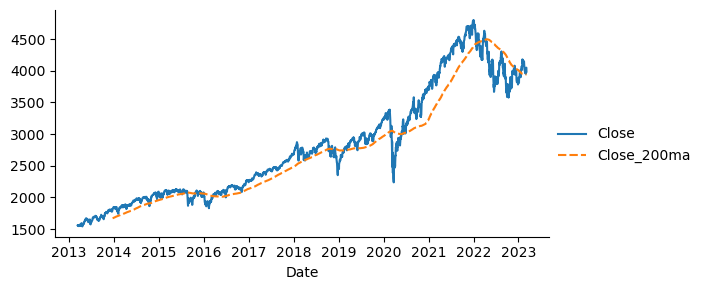

In [23]:
import matplotlib as plt
import seaborn as sns
fig = sns.relplot(data=sp500_history[['Close','Close_200ma']], kind='line', height=3, aspect=2.0)
fig.savefig('chart.png')   
fig.savefig('C:\\working_directory\\images\\chart.png')  

In [31]:
from openpyxl.chart import LineChart, Reference

with pd.ExcelWriter('generated_excel_report.xlsx', engine='openpyxl') as writer:
    sp500_history.to_excel(writer, sheet_name='sp500 historical')
    sp500_history_summary.to_excel(writer, sheet_name = 'sp500 historical summary')   
    
    wb = writer.book
    ws = wb['sp500 historical']
    
    max_row = ws.max_row
    
    values_close = Reference(ws, min_col=5, max_col=5, min_row=1, max_row=max_row )
    values_close_ma = Reference(ws, min_col=7, max_col=7, min_row=1, max_row=max_row )    

ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.

In [18]:
help(plt)

Help on package matplotlib:

NAME
    matplotlib - An object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the explicit object-oriented library is
    encouraged when programming; the implicit pyplot interface is primarily for
    working interactively. The exceptions to this suggestion are the pyplot
    functions `.pyplot.figure`, `.pyplot.subplot`, `.pyplot.subplots`, and
    `.pyplot.savefig`, which can greatly simplify scripting.  See
    :ref:`api_interfaces` for an explanation of the tradeoffs between the implicit
    and explicit interfaces.
    
    Modules include:
    
        :

## Step 1 -Format Entire Directory of Excel Files 

In [4]:
testing = True
if testing:
    formatted_excel_Files = re.format_excel_directory('J:\IT GLIN Data Services Shared\TempData')
    print(f'Formatted #{formatted_excel_Files} excel files') 

Found 0 excel files in directory:J:\IT GLIN Data Services Shared\TempData
Formatted #0 excel files


In [5]:
testing = True
if testing:
    formatted_excel_Files = re.format_excel_directory('C:\working_directory\excel')
    print(f'Formatted #{formatted_excel_Files} excel files') 

Found 2 excel files in directory:C:\working_directory\excel

Read in raw file:C:\working_directory\excel\design_goal.xlsx
Worksheet Design Goal
Worksheet Design Goal1
Worksheet Design Goal2
Formatted:C:\working_directory\excel\design_goal_ft.xlsx

Read in raw file:C:\working_directory\excel\import_directory_registry.xlsx
Worksheet Import Directory Reg
Formatted:C:\working_directory\excel\import_directory_registry_ft.xlsx
Formatted #2 excel files


In [6]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-03-06 13:51:29,704 - INFO - START remote_process_automation_excel =============================================
2023-03-06 13:51:29,704 - INFO - START remote_process_automation_excel Start Time = 2023-03-06 13:51:29
2023-03-06 13:51:29,705 - INFO - remote_process_automation_excel Step 0 - Initialize the configuration file parser
2023-03-06 13:51:29,715 - INFO - Found 0 excel files in directory:J:\IT GLIN Data Services Shared\TempData
2023-03-06 13:51:29,732 - INFO - Found 2 excel files in directory:C:\working_directory\excel
2023-03-06 13:51:29,797 - INFO - 
Read in raw file:C:\working_directory\excel\design_goal.xlsx
Worksheet Design Goal
Worksheet Design Goal1
Worksheet Design Goal2
Formatted:C:\working_directory\excel\design_goal_ft.xlsx
2023-03-06 13:51:29,823 - INFO - 
Read in raw file:C:\working_directory\excel\import_directory_registry.xlsx
Worksheet Import Directory Reg
Formatted:C:\working_directory\excel\import_directory_registry_ft.xlsx
2023-03-06 13:51:29,840 - INFO - 